<a href="https://colab.research.google.com/github/meryreddoor/yogagame_/blob/primeraRama/Clean_outsider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
from keras.models import load_model
from keras.models import model_from_json
import cv2 
import numpy as np

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def cropImage(path):
  # load image
  img = cv2.imread(path) 
  rsz_img = cv2.resize(img, None, fx=1, fy=1) # resize since image is huge
  gray = cv2.cvtColor(rsz_img, cv2.COLOR_BGR2GRAY) # convert to grayscale

  # threshold to get just the signature
  retval, thresh_gray = cv2.threshold(gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

  # find where the signature is and make a cropped region
  points = np.argwhere(thresh_gray==0) # find where the black pixels are
  points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
  x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
  x, y, w, h = x-10, y-10, w+20, h+20 # make the box a little bigger
  crop = gray[y:y+h, x:x+w] # create a cropped region of the gray image

  # get the thresholded crop
  retval, thresh_crop = cv2.threshold(crop, thresh=200, maxval=255, type=cv2.THRESH_BINARY)

  # display
  cv2.imwrite(path,thresh_crop)
  cv2.waitKey(0)
  cv2_imshow(thresh_crop)
  return

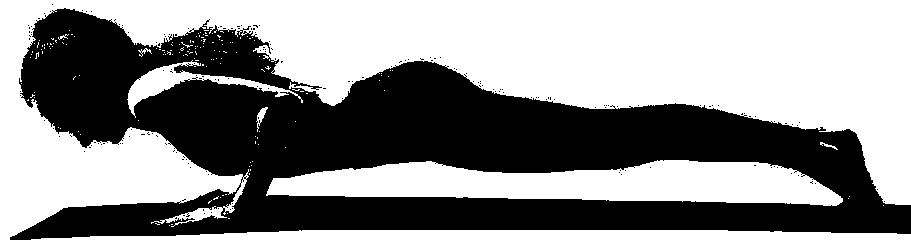

In [22]:
cropImage('/content/ejemplo acostado.jpg')